# Lego Game Show Data Analysis

In [1]:
#%qtconsole
#To get remote console connection info use: %connect_info

import os

# Turn off warnings that pollute the content
import warnings
warnings.filterwarnings('ignore')

# Embed plots in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.4
mpl.rcParams['grid.color'] = '#555555'
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '-'
# 3-cycle
#csamp = np.repeat(np.arange(3)/12.0, 3) + np.tile(np.linspace(0, 1, num=4)[:3], 3)
#CMAP = plt.get_cmap('hsv')(csamp).tolist()
#c_cycle = mpl.cycler('color', CMAP)
#mpl.rcParams['axes.prop_cycle'] = c_cycle

# Render plots using SVG format
%config InlineBackend.figure_formats=['svg']
#%config InlineBackend.figure_formats=['png', 'pdf']
#%config InlineBackend.figure_format='png'

import itertools # itertools.product useful for looping n-D combinations
from collections import OrderedDict as OD
import random

# Typeset arbitrary latex math with display(Math('y=x^2')) where y=x^2 is any LaTeX math
from IPython.display import display, Math, Latex, HTML, SVG, Markdown
from IPython.display import Image # Syntax: Image(filename='file', width=wd, height=ht)
# Setup to use breakpt() for droppping into ipdb:
from IPython.core.debugger import Tracer
breakpt = Tracer()

import numpy as np
import pandas as pd
pd.set_option('html', True)
pd.set_option('max_rows', 40)
pd.set_option('max_columns', 80)
pd.set_option('display.width', 80)
pd.set_option('precision', 2)

# width x height of figure plots
FIGSIZE = (10,6)

CWD = os.getcwd()

# File that maps individual identifiers to categories
IDFILE = 'lego_gameshow_datasheet_ids_1.csv'

# File that contains game results data
#DATFILE = 'lego_gameshow_data_sample_1.csv'
DATFILE = 'lego_gameshow_data_sample_2.csv'
#DATFILE = 'lego_gameshow_data_1.csv'


In [2]:
#%qtconsole

In [3]:
numbers = [1, 2, 3, 4]
letters = ['A', 'B', 'C', 'D']
colors = ['red', 'yellow', 'green', 'blue']
shapes = ['circle', 'square', 'triangle', 'star']
directions = ['North', 'East', 'South', 'West']
seasons = ['winter', 'spring', 'summer', 'fall']
elements = ['earth', 'water', 'air', 'fire']
phases = ['solid', 'liquid', 'gas', 'plasma']

In [4]:
# Individuals identified by numbers 1-16 can be uniquely
# arrange onto 4 teams of 4 for 5 rounds given the following
# team memberships:
r1 = [(1, 2, 3, 4), (5, 6, 7, 8), (9, 10, 11, 12), (13, 14, 15, 16)]
r2 = [(1, 5, 9, 13), (2, 6, 10, 14), (3, 7, 11, 15), (4, 8, 12, 16)]
r3 = [(1, 6, 11, 16), (2, 5, 12, 15), (3, 8, 9, 14), (4, 7, 10, 13)]
r4 = [(1, 7, 12, 14), (2, 8, 11, 13),(3, 5, 10, 16), (4, 6, 9, 15)]
r5 = [(1, 8, 10, 15), (2, 7, 9, 16), (3, 6, 12, 13), (4, 5, 11, 14)]

rounds = [r1, r2, r3, r4, r5]

In [5]:
d1 = OD()
d2 = OD()
d3 = OD()
d4 = OD()
d5 = OD()
for i, t in enumerate(['team1', 'team2', 'team3', 'team4']):
    d1['round'] = 1
    d2['round'] = 2
    d3['round'] = 3
    d4['round'] = 4
    d5['round'] = 5
    d1[t] = r1[i]
    d2[t] = r2[i]
    d3[t] = r3[i]
    d4[t] = r4[i]
    d5[t] = r5[i]

In [6]:
df = pd.concat([pd.DataFrame(_) for _ in [d1, d2, d3, d4, d5]])

## Team members per round

In [7]:
df.index = np.arange(20)
df.index.name = 'index'
df2 = df.set_index('round', append=True)
df2

,,team1,team2,team3,team4
index,round,,,,
0,1,1,5,9,13
1,1,2,6,10,14
2,1,3,7,11,15
3,1,4,8,12,16
4,2,1,2,3,4
5,2,5,6,7,8
6,2,9,10,11,12
7,2,13,14,15,16
8,3,1,2,3,4


In [8]:
labels = [numbers, letters, colors,
          shapes, directions, seasons,
          elements, phases]
rlist = list()
for i, r in enumerate(rounds):
    rdict = {}
    for j, t in enumerate(r):
        rdict[labels[i][j]] = t
    rlist.append(rdict)
    
rlist

[{1: (1, 2, 3, 4), 2: (5, 6, 7, 8), 3: (9, 10, 11, 12), 4: (13, 14, 15, 16)},
 {'A': (1, 5, 9, 13),
  'B': (2, 6, 10, 14),
  'C': (3, 7, 11, 15),
  'D': (4, 8, 12, 16)},
 {'blue': (4, 7, 10, 13),
  'green': (3, 8, 9, 14),
  'red': (1, 6, 11, 16),
  'yellow': (2, 5, 12, 15)},
 {'circle': (1, 7, 12, 14),
  'square': (2, 8, 11, 13),
  'star': (4, 6, 9, 15),
  'triangle': (3, 5, 10, 16)},
 {'East': (2, 7, 9, 16),
  'North': (1, 8, 10, 15),
  'South': (3, 6, 12, 13),
  'West': (4, 5, 11, 14)}]

## Membership identifiers

Cross reference the membership ids to categories.

In [9]:
df = pd.read_csv(os.path.join(CWD, IDFILE))
df.set_index('identity', inplace=True)
round_names = list(df.columns)
df

,number,letter,color,shape,direction,season,element,phase
identity,,,,,,,,
1,1,A,red,circle,north,fall,air,plasma
2,1,B,yellow,square,east,winter,fire,gas
3,1,C,green,triangle,south,spring,earth,solid
4,1,D,blue,star,west,summer,water,liquid
5,2,A,yellow,triangle,west,fall,air,solid
6,2,B,red,star,south,spring,fire,plasma
7,2,C,blue,circle,east,winter,water,liquid
8,2,D,green,square,north,summer,earth,gas
9,3,A,green,star,east,winter,earth,liquid


## Grouping map

Show in detail which members are in which group each round
including all of the associated categories.

In [10]:
def show_groups(round_num):
    gname = round_names[round_num]
    grouping = df.groupby(round_names[round_num])

    for gid, gdf in grouping:
        display(Markdown("### Group: {}".format(gid)))
        display(gdf)

## Import Data

Read in the data file where the team results per round have been recorded.

In [11]:
data = pd.read_csv(os.path.join(CWD, DATFILE))
data.set_index('group_id', inplace=True)
data

,round,grouping,guess_other,other_guess
group_id,,,,
1,1,number,0,1
2,1,number,1,0
3,1,number,2,3
4,1,number,2,2
A,2,letter,3,3
B,2,letter,1,2
C,2,letter,0,3
D,2,letter,2,2
red,3,color,0,0


## Data Analysis

Use the team results data to assign scores to the individual members
and plot the results.

In [12]:
# Flesh out the data for individual identities based on group_id
dat_list = list()
for gid, gdat in data.iterrows():
    grouping = gdat['grouping']
    if 'number' == grouping:
        gid = int(gid)
    g1 = df.groupby(grouping)
    # The ids for populating data are available
    gr_ids = g1.groups[gid]
    display("Assigning score for group '{}' members: {}".format(gid, gr_ids))
    for m_id in gr_ids:
        drow = df.loc[m_id]
        drow['id'] = m_id
        drow['guess_other'] = gdat['guess_other']
        drow['other_guess'] = gdat['other_guess']
        dat_list.append(drow)


"Assigning score for group '1' members: [1, 2, 3, 4]"

"Assigning score for group '2' members: [5, 6, 7, 8]"

"Assigning score for group '3' members: [9, 10, 11, 12]"

"Assigning score for group '4' members: [13, 14, 15, 16]"

"Assigning score for group 'A' members: [1, 5, 9, 13]"

"Assigning score for group 'B' members: [2, 6, 10, 14]"

"Assigning score for group 'C' members: [3, 7, 11, 15]"

"Assigning score for group 'D' members: [4, 8, 12, 16]"

"Assigning score for group 'red' members: [1, 6, 11, 16]"

"Assigning score for group 'yellow' members: [2, 5, 12, 15]"

"Assigning score for group 'green' members: [3, 8, 9, 14]"

"Assigning score for group 'blue' members: [4, 7, 10, 13]"

"Assigning score for group 'circle' members: [1, 7, 12, 14]"

"Assigning score for group 'square' members: [2, 8, 11, 13]"

"Assigning score for group 'triangle' members: [3, 5, 10, 16]"

"Assigning score for group 'star' members: [4, 6, 9, 15]"

"Assigning score for group 'north' members: [1, 8, 10, 15]"

"Assigning score for group 'east' members: [2, 7, 9, 16]"

"Assigning score for group 'south' members: [3, 6, 12, 13]"

"Assigning score for group 'west' members: [4, 5, 11, 14]"

"Assigning score for group 'winter' members: [2, 7, 9, 16]"

"Assigning score for group 'spring' members: [3, 6, 10, 13]"

"Assigning score for group 'summer' members: [4, 8, 11, 14]"

"Assigning score for group 'fall' members: [1, 5, 12, 15]"

"Assigning score for group 'earth' members: [3, 8, 9, 16]"

"Assigning score for group 'water' members: [4, 7, 11, 14]"

"Assigning score for group 'air' members: [1, 5, 12, 13]"

"Assigning score for group 'fire' members: [2, 6, 10, 15]"

"Assigning score for group 'solid' members: [3, 5, 11, 16]"

"Assigning score for group 'liquid' members: [4, 7, 9, 14]"

"Assigning score for group 'gas' members: [2, 8, 12, 15]"

"Assigning score for group 'plasma' members: [1, 6, 10, 13]"

In [13]:
dat_df = pd.DataFrame(dat_list, index=range(len(dat_list)))
# Re-arrange columns
dat_cols = list(dat_df.columns)
dat_cols.remove('id')
dat_cols = ['id'] + dat_cols
dat_df = dat_df[dat_cols]

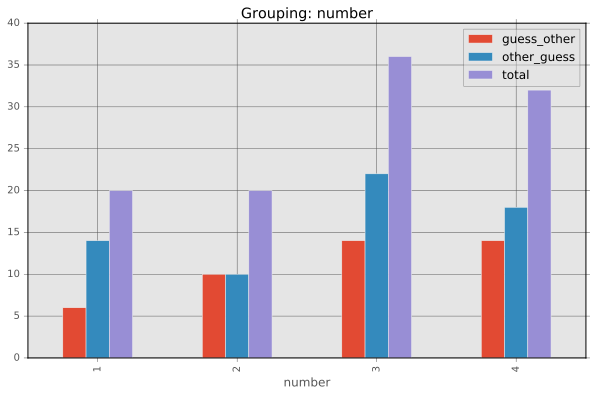

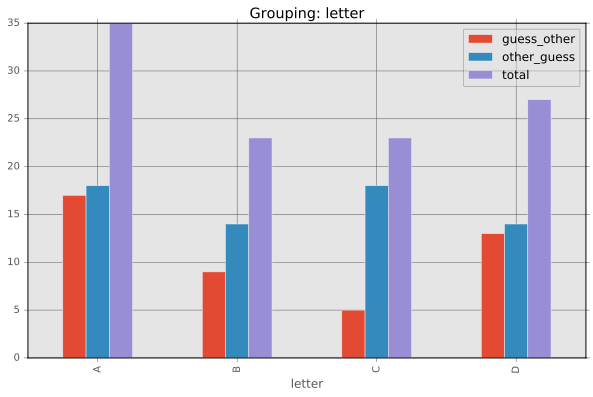

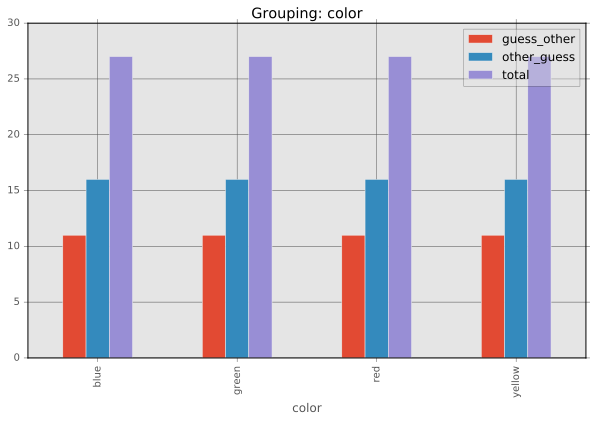

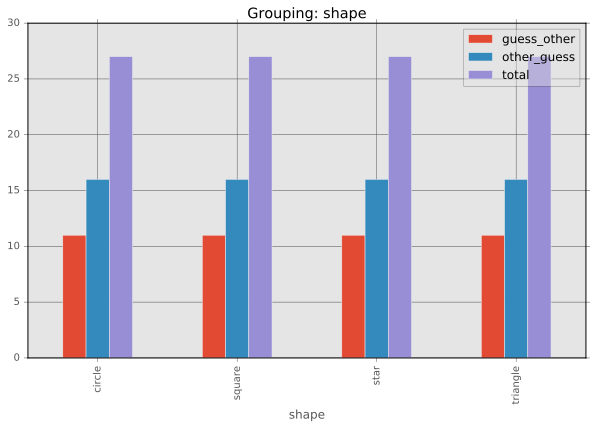

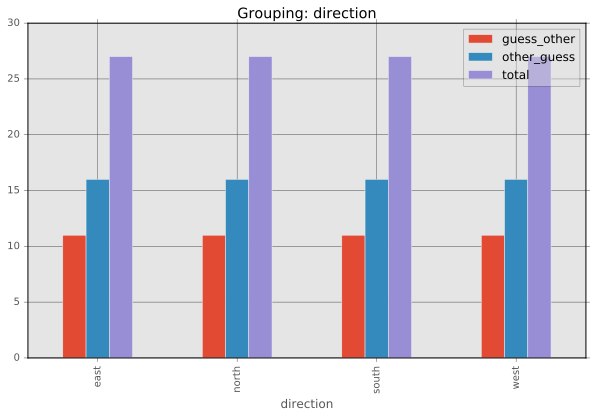

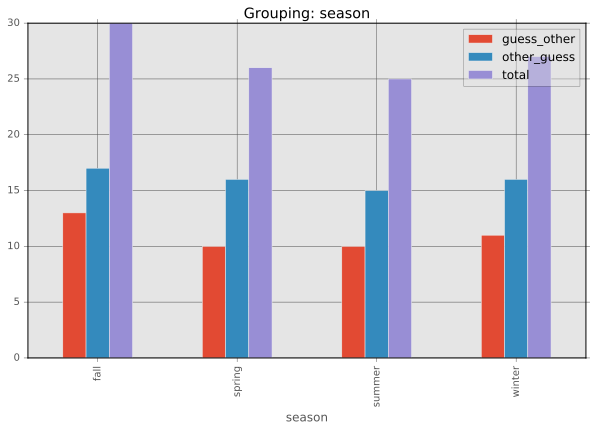

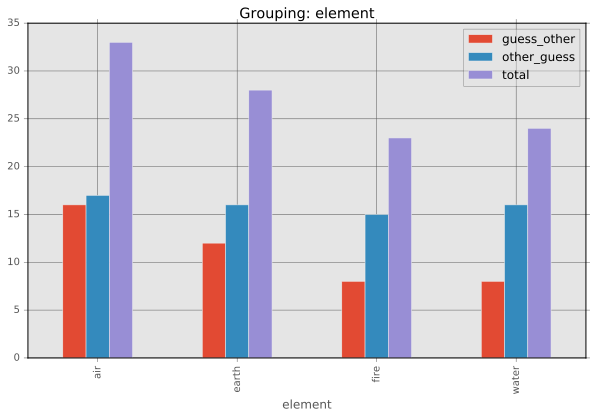

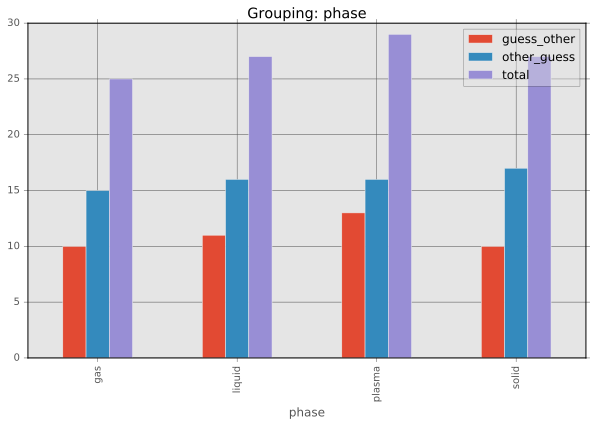

In [14]:
for rn in round_names:
    #display(Markdown("## Group: {}".format(rn)))
    sum_df = dat_df.groupby(rn).sum()
    sum_df = sum_df.loc[:, 'guess_other':]
    sum_df['total'] = sum_df.sum(axis=1)
    #display(sum_df)
    sum_df.plot(kind='bar', title="Grouping: {}".format(rn), figsize=FIGSIZE)

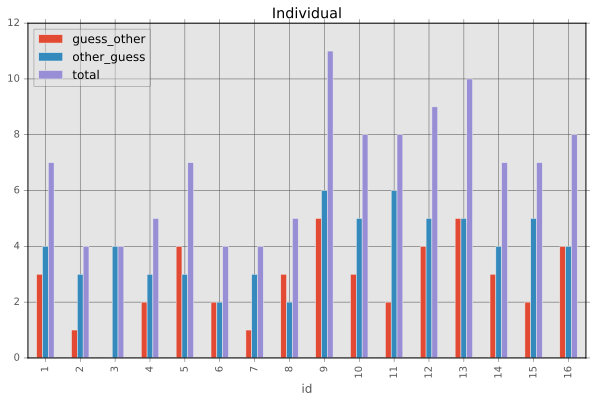

In [15]:
# Plot per individual
id_sum = dat_df.groupby('id').sum()
id_sum = id_sum.loc[:, 'guess_other':]
id_sum['total'] = id_sum.sum(axis=1)
#id_sum
id_sum.plot(kind='bar', title="Individual", figsize=FIGSIZE)